In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# https://www.kaggle.com/gauthamp10/google-playstore-apps

In [2]:
df = pd.read_csv('..\data\Google-Playstore.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [3]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [4]:
df.head(5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [6]:
df.Installs.unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', nan,
       '50,000,000+', '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [7]:
df['Maximum Installs'].describe()

count    2.312944e+06
mean     3.202017e+05
std      2.355495e+07
min      0.000000e+00
25%      8.400000e+01
50%      6.950000e+02
75%      7.354000e+03
max      1.205763e+10
Name: Maximum Installs, dtype: float64

In [8]:
df2 = df[(df['Maximum Installs']>=10000) & (df['Maximum Installs']<100000)]

now removing apps with no ratings and apps with in app purchases

In [9]:
df2 = df2[df2['Rating Count']!=0]
df2 = df2[df2['In App Purchases']==False]

In [10]:
df2_free = df2[df2.Free==True]
df2_free = df2_free[df2_free['Ad Supported']==True]
df_paid = df2[df2.Free==False]

In [11]:
df2_free.shape[0]

178439

In [12]:
df_paid.shape[0]

3612

<AxesSubplot:>

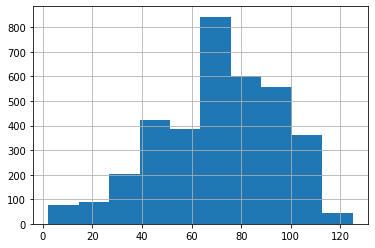

In [44]:
((df_paid.Rating)**(3)).hist()

In [41]:
stats.describe((df_paid.Rating.dropna())**(3))

DescribeResult(nobs=3586, minmax=(2.197, 125.0), mean=70.97183128834355, variance=597.6092940370793, skewness=-0.4022335449150115, kurtosis=-0.31538748343242773)

<AxesSubplot:>

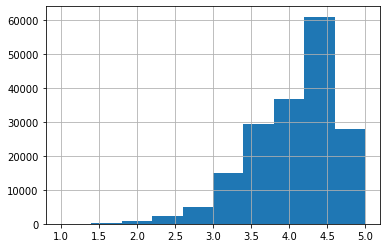

In [14]:
df2_free.Rating.hist()

<AxesSubplot:>

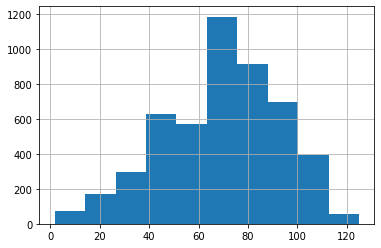

In [39]:
((df2_free.sample(5000).Rating)**3).hist()

In [42]:
stats.describe(((df2_free.sample(5000).Rating.dropna())**3))

DescribeResult(nobs=4985, minmax=(2.7439999999999993, 125.0), mean=69.01679077231697, variance=578.6568718637191, skewness=-0.3357276043549342, kurtosis=-0.3910775317850468)

In [ ]:
# need to look up how to see if normal using inferential stats